In [2]:
# imports

import sys
import os

import pandas as pd

sys.path.append('D:/grb/grbLC/')
import grblc

In [2]:
# run this the first time you use grblc to download SFD maps

import grblc.convert.sfd
grblc.convert.sfd.fetch()

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.


In [3]:
# create a list of the path of all our example grbs.

path = "data/"
grblist = []
filelist = []

for root, dirs, files in os.walk(path):
    for file in files:
        filelist.append(os.path.join(root,file))
        names = file.split('_')
        grblist.append(names[0])

filedf=pd.DataFrame()
filedf.index = grblist
filedf['path'] = filelist

In [15]:
# reading data with grblc
import sys
sys.path.append('D:/grb/grbLC/')
import grblc.evolution.io as io

data = io.read_data(path='converted/970228A_magAB_extcorr.txt')
freq = data['band'].value_counts()
print(freq.index[0])
data['occur']=data['band'].map(data['band'].value_counts())

V


In [5]:
# convert to AB system and correct for extinction

import warnings
warnings.filterwarnings('ignore')

import grblc.convert as cv

info = pd.read_csv('data/grblist.csv', sep=',', index_col='grb')

index = ['970228A']

for grb in index:
    cv.correctGRB(grb = grb,
                  ra = info.loc[grb, 'ra'],
                  dec = info.loc[grb, 'dec'],
                  path = filedf.loc[grb,'path'],
                  save_in_folder = 'converted/',
                  debug= False
                  )

In [1]:
import sys
sys.path.append('D:/grb/grbLC/')
from grblc.evolution.lightcurve import Lightcurve

lc = Lightcurve(path='converted/970228A_magAB_extcorr.txt',
                              data_space = "log",
                              name = '970228A')

lc.displayGRB()

The most numerous filter of this GRB:  V , with 10 occurrences.
The most numerous will be considered for rescaling


D:\grb/grbLC\grblc\evolution\lightcurve.py:458: RuntimeWarning: divide by zero encountered in log10
  timediff = [[p1,p2] for p1 in range(len(mostcommonx)) for p2 in range(len(subx)) if np.log10(np.abs(10**mostcommonx[p1]-10**subx[p2]))<=np.log10((10**mostcommonx[p1])*2.5/100)]
D:\grb/grbLC\grblc\evolution\lightcurve.py:462: RuntimeWarning: divide by zero encountered in log10
  sf2=[subx[ll[1]],mostcommony[ll[0]]-suby[ll[1]],np.log10(np.abs(10**mostcommonx[ll[0]]-10**subx[ll[1]])),mostcommonyerr[ll[0]]+suberror_y[ll[1]]]


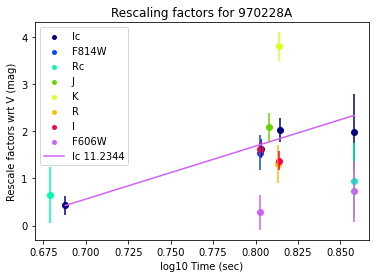

(     band  Occur_band  Log10(t)  Resc_fact  Resc_fact_err  Resc_fact_weights
 0      Rc           2  0.678800   0.644652           0.60           1.666667
 1      Ic           6  0.687906   0.426320           0.20           5.000000
 2       I           2  0.802734   1.625388           0.14           7.142857
 3   F606W           2  0.802875   0.278039           0.37           2.702703
 4   F814W           1  0.802875   1.541195           0.37           2.702703
 5      Ic           6  0.803268   1.626320           0.20           5.000000
 6       J           1  0.807712   2.096616           0.30           3.333333
 7       R           1  0.812938   1.307868           0.40           2.500000
 8       I           2  0.813907   1.375388           0.20           5.000000
 9       K           1  0.814001   3.799585           0.30           3.333333
 10     Ic           6  0.814135   2.026320           0.25           4.000000
 11  F606W           2  0.858056   0.723591           0.65      

In [1]:
import sys
sys.path.append('D:/grb/grbLC/')
from grblc.evolution.lightcurve import Lightcurve

lc = Lightcurve(path='converted/970228A_magAB_extcorr.txt',
                              data_space = "log",
                              name = '970228A')

lc.colorevolGRB(return_rescaledf=True)